# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Add URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_list = []
#print list
print("Beginning Data Retrieval")
print("--------------------------")

#adding counters for loops
record_counter = 1
set_counter = 1

#looping list
#adding group of 50 as in example
#Beginning Data Retrieval     
#-----------------------------
#Processing Record 1 of Set 1 | severo-kurilsk
for i, city in enumerate(cities):
    
    if(i % 50 ==0 and i >=50):
        set_counter +=1
        record_counter = 0
    url_city = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_counter, set_counter, city))
    record_counter +=1
    
    #api request for each city
    try:
        weather_by_city = requests.get(url_city).json()
        city_lat = weather_by_city["coord"]["lat"]
        city_lon = weather_by_city["coord"]["lon"]
        city_temp_max = weather_by_city["main"]["temp_max"]
        city_humidity = weather_by_city["main"]["humidity"]
        city_clouds_all = weather_by_city["clouds"]["all"]
        city_wind_speed = weather_by_city["wind"]["speed"]
        city_country = weather_by_city["sys"]["country"]
        city_date = weather_by_city["dt"]
        
        #add to list for city_list
        city_list.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lon,
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds_all,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})
        #City not found. Skipping... from record 32 to 33
    except:
        print("City not found. Skipping...")
        pass
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")
        
        
        


Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | laibin
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | grindavik
Processing Record 10 of Set 1 | tautira
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | bonga
Processing Record 18 of Set 1 | san joaquin
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | cojutepeque
Processing Record 21 of Set 1 | vanavara
Processing Record 22 of Set 1 | deputatskiy
Processing Record 23 of Set 1 | new norfolk
Processi

Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | lebedinyy
Processing Record 41 of Set 4 | katherine
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | bukachacha
Processing Record 49 of Set 4 | carauari
Processing Record 0 of Set 5 | pontal do parana
Processing Record 1 of Set 5 | nouakchott
Processing Record 2 of Set 5 | caiaponia
Processing Record 3 of Set 5 | nortelandia
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | galway
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | urumqi
Processing Record 10 of Set 5 | thinadhoo
Processing Record 11 of Set 5 | guanare
Processing Record 12 of Se

Processing Record 26 of Set 8 | halifax
Processing Record 27 of Set 8 | coihaique
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | independence
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | baturaja
Processing Record 32 of Set 8 | riga
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | san-pedro
Processing Record 35 of Set 8 | yumen
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | monrovia
Processing Record 39 of Set 8 | zedelgem
Processing Record 40 of Set 8 | antalaha
Processing Record 41 of Set 8 | acajutla
Processing Record 42 of Set 8 | puerto quijarro
Processing Record 43 of Set 8 | bengkulu
Processing Record 44 of Set 8 | dubrovnik
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | jalu
Processing Record 47 of Set 8 | lake city
Processing Record 48 of Set 8 | kalabo
Processing Record 49 of Set 8 | constitucion
Processing Record 0 of 

Processing Record 12 of Set 12 | nantucket
Processing Record 13 of Set 12 | ukiah
Processing Record 14 of Set 12 | asifabad
Processing Record 15 of Set 12 | kaeo
Processing Record 16 of Set 12 | morag
Processing Record 17 of Set 12 | ormara
Processing Record 18 of Set 12 | araouane
Processing Record 19 of Set 12 | iancu jianu
Processing Record 20 of Set 12 | zykovo
Processing Record 21 of Set 12 | sorochinsk
Processing Record 22 of Set 12 | temaraia
City not found. Skipping...
Processing Record 23 of Set 12 | dunmore east
Processing Record 24 of Set 12 | dabakala
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | lubango
Processing Record 27 of Set 12 | villarrica
Processing Record 28 of Set 12 | elizabeth city
Processing Record 29 of Set 12 | bataipora
Processing Record 30 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 31 of Set 12 | caloundra
Processing Record 32 of Set 12 | sibolga
Processing Record 33 of Set 12 | kahului
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_list_pd = pd.DataFrame(city_list)

lats = city_list_pd["Lat"]
max_temps = city_list_pd["Max Temp"]
humidity = city_list_pd["Humidity"]
cloudiness = city_list_pd["Cloudiness"]
wind_speed = city_list_pd["Wind Speed"]

city_list_pd.to_csv(output_data_file, index_label="City_ID")

city_list_pd.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [12]:
city_list_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,53.60,50,40,33.33,CL,1580239820
1,shimoda,34.67,138.95,53.60,93,90,6.93,JP,1580240039
2,hilo,19.73,-155.09,72.00,83,90,11.41,US,1580240037
3,barrow,71.29,-156.79,-27.40,67,1,4.70,US,1580240040
4,vestmannaeyjar,63.44,-20.27,34.92,61,0,3.42,IS,1580240040


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

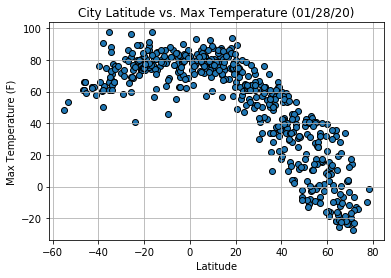

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Cities")

# Adding labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving figure to file output
plt.savefig("../output_data/latvtemp.png")
plt.show()
#This plot is showing the city latitude versus the max temperature at the most recent date pulled. Max temp appears to be higher at a latitude of 0

#### Latitude vs. Humidity Plot

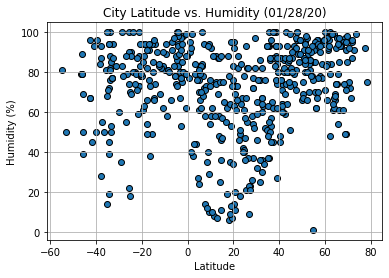

In [14]:
# Latvhum plot
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=1, label="Cities")

#labels and stuff
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save output to png file
plt.savefig("../output_data/latvhum.png")

# print plot
plt.show()
#This plot is showing the humidity for various cities at given latitudes. Humidity appears to be lower near a latitude of 0

#### Latitude vs. Cloudiness Plot

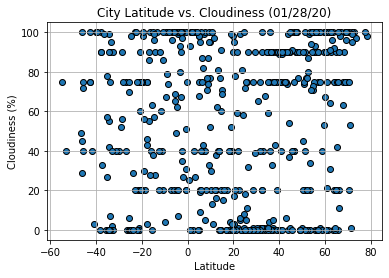

In [15]:
# lat v cloudiness scatter
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=1, label="Cities")

# labels and stuff
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the png file to output_data
plt.savefig("../output_data/latvcloudiness.png")

# print plot
plt.show()
#This shows cloudiness at various latitudes. It appears that cloudiness is not affected by latitude.

#### Latitude vs. Wind Speed Plot

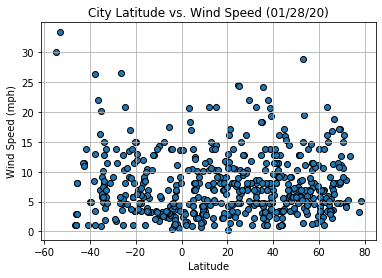

In [17]:
# latvwindspeed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=1, label="Cities")

# labels and stuff
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the png file
plt.savefig("../output_data/latvwindspeed.png")

# print plot
plt.show()
#This shows wind speed for cities at given latitudes. It appears that the highest wind speeds are at the highest and lowest latitudes, though they may be outliers. Overall, wind speeds appear fairly consistent across latitudes

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression